In [1]:
import pandas as pd

Fb_Thai = pd.read_csv('Publicacions Facebook Thailandia.csv')
Fb_Thai

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


# Limpieza de Datos y Análisis exploratorio

### Columnas y tipos de valores

In [2]:
Fb_Thai.columns.tolist()

['status_id',
 'status_type',
 'status_published',
 'num_reactions',
 'num_comments',
 'num_shares',
 'num_likes',
 'num_loves',
 'num_wows',
 'num_hahas',
 'num_sads',
 'num_angrys',
 'Column1',
 'Column2',
 'Column3',
 'Column4']

#### Descripción de las variables

1.  status_id: identificación.
2.  status_type: tipo de publicación (video, foto...).
3.  status_published: fecha de publicación.
4.  num_reactions: reacciones de la publicación.
5.  num_comments: número de comentarios sobre la publicación.
6.  num_shares: número de veces que se ha compratido la publicación.
7.  num_likes: emojis de 'me gusta' recibidos por publicación.
8.  num_loves: 'corazones' por publicación.
9.  num_wows: 'sorpresas'
10. num_hahas: 'sonrisas'
11. num_sads: 'caras tristes'
12. num_angrys: 'caras enfado'
13. Column1, Column2, Column3 y Column4: están vacias (posteriormente se eliminarán).

In [3]:
# Comprobación de las características de las variables del dataset

Fb_Thai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [4]:
# Comprobación de datos nulos

Fb_Thai.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [5]:
# Comprobación de datos duplicados

Fb_Thai.duplicated().sum()

51

In [6]:
Fb_Thai = Fb_Thai.drop_duplicates() # Eliminación de las filas duplicadas

In [7]:
Fb_Thai = Fb_Thai.drop(columns = ['Column1', 'Column2', 'Column3', 'Column4', 'status_id', 'status_published'], axis=1)

# Se eliminan las columnas que carecen de dato alguno, así como las que no serán empleadas en este anlálisis

In [8]:
# Para una mejor visualización y manejo de las columnas, se les atribuye un nuevo nombre (más corto)

cols_renombr= ['status_type', 'reactions', 'comments', 'shares', 'likes', 'loves', 'wows', 'hahas', 'sads', 'angrys']
Fb_Thai.columns = cols_renombr

In [9]:
# Así quedaría ahora el dataset

Fb_Thai

,status_type,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


## Análisis exploratorio

In [10]:
# Tabla resumen estadístico del dataset

Fb_Thai.describe().round(3)

,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys
count,6999.000,6999.000,6999.000,6999.000,6999.000,6999.000,6999.000,6999.000,6999.000
mean,224.995,225.552,40.259,209.947,12.752,1.253,0.698,0.233,0.110
std,452.881,892.743,132.047,439.550,40.107,8.726,3.971,1.481,0.689
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,17.000,0.000,0.000,17.000,0.000,0.000,0.000,0.000,0.000
50%,58.000,4.000,0.000,57.000,0.000,0.000,0.000,0.000,0.000
75%,216.000,22.000,4.000,182.000,3.000,0.000,0.000,0.000,0.000
max,4710.000,20990.000,3424.000,4710.000,657.000,278.000,157.000,51.000,31.000


# Ejercicio 1
## Clasificación de los diferentes registros usando el algoritmo K-means

### Escalado de datos

In [11]:
import warnings
warnings.filterwarnings("ignore")


from scipy import stats
from scipy.stats import shapiro

cols_num = Fb_Thai[['reactions', 'comments', 'shares', 'likes', 'loves', 'wows', 'hahas', 'sads', 'angrys']]

for i in cols_num:
    shapiro_test = stats.shapiro(cols_num[i])
    print("La variable", i, "tiene un P_valor de", shapiro_test.pvalue)
    if shapiro_test.pvalue > 0.05:
        print("Probablemente tiene una distribución normal, se ACEPTA la hipótesis nula.")
        print()
    else:
        print("Probablemente No tiene una distribución normal, se RECHAZA la hipótesis nula.")
        print()

La variable reactions tiene un P_valor de 0.0
Probablemente No tiene una distribución normal, se RECHAZA la hipótesis nula.

La variable comments tiene un P_valor de 0.0
Probablemente No tiene una distribución normal, se RECHAZA la hipótesis nula.

La variable shares tiene un P_valor de 0.0
Probablemente No tiene una distribución normal, se RECHAZA la hipótesis nula.

La variable likes tiene un P_valor de 0.0
Probablemente No tiene una distribución normal, se RECHAZA la hipótesis nula.

La variable loves tiene un P_valor de 0.0
Probablemente No tiene una distribución normal, se RECHAZA la hipótesis nula.

La variable wows tiene un P_valor de 0.0
Probablemente No tiene una distribución normal, se RECHAZA la hipótesis nula.

La variable hahas tiene un P_valor de 0.0
Probablemente No tiene una distribución normal, se RECHAZA la hipótesis nula.

La variable sads tiene un P_valor de 0.0
Probablemente No tiene una distribución normal, se RECHAZA la hipótesis nula.

La variable angrys tiene u

#### Observaciones:
ninguna de las variables tiene una distribución normal.

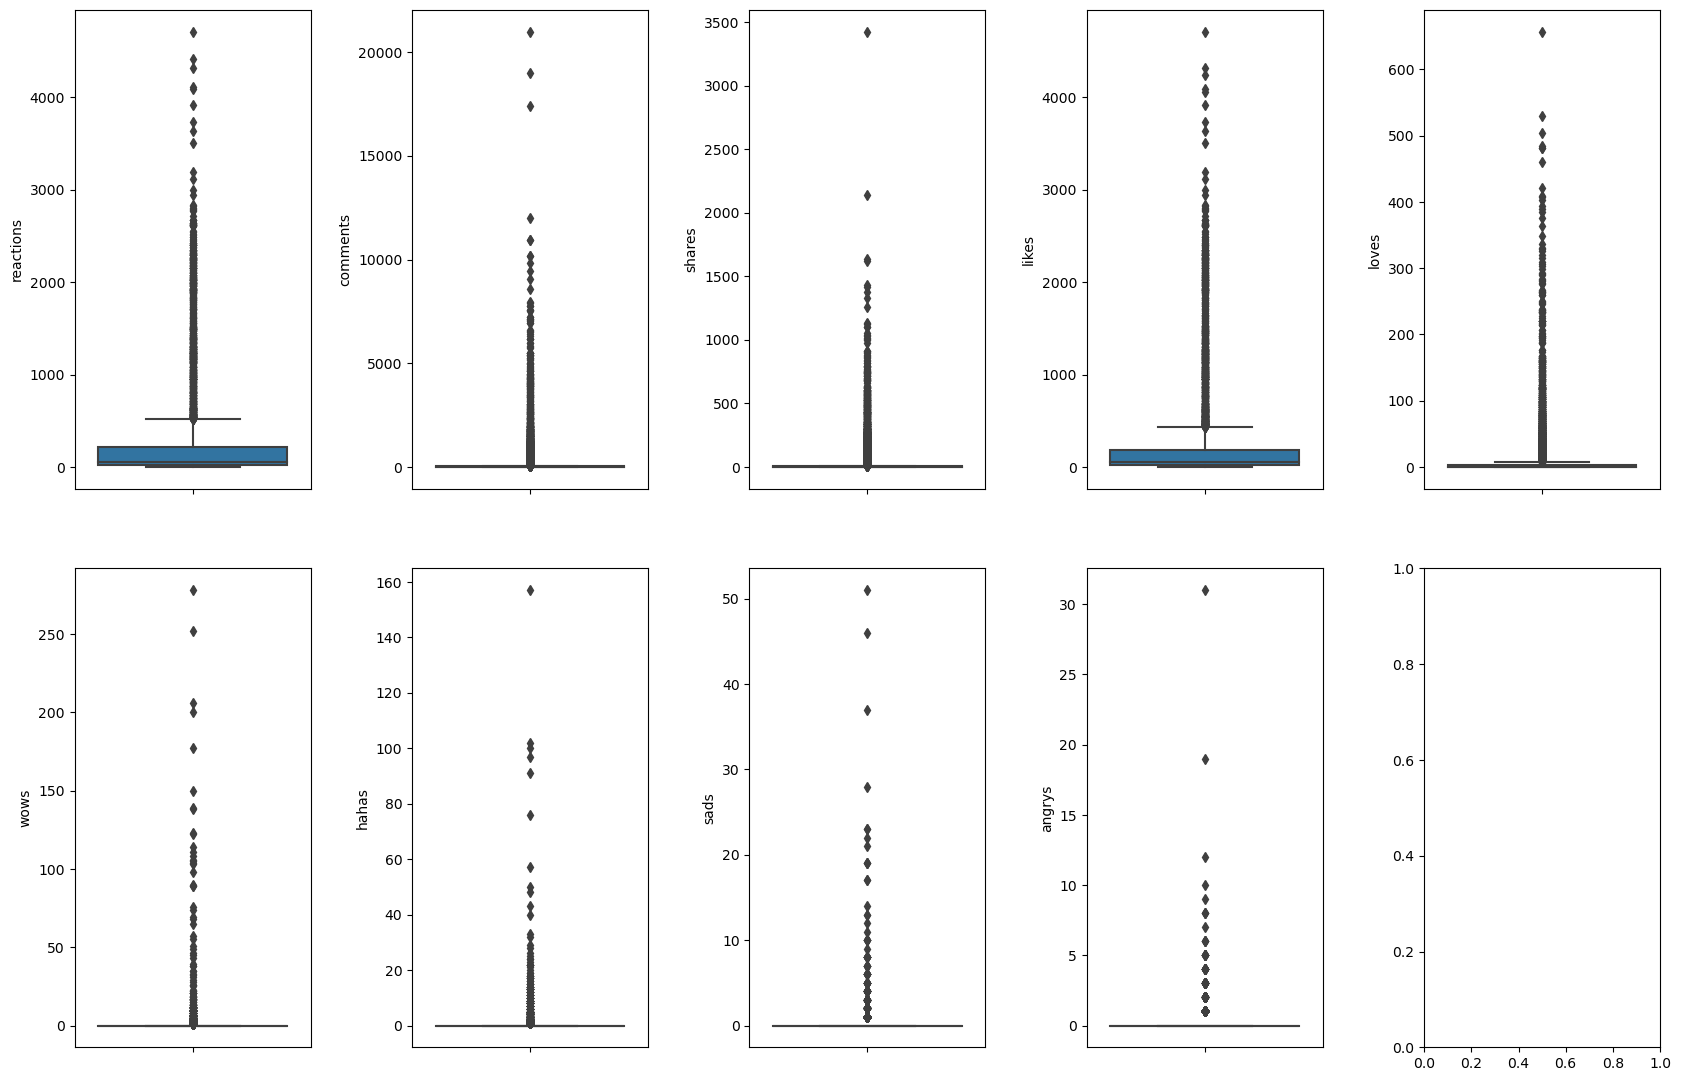

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(18, 12))
conta = 0
ax = ax.flatten()


for i,var in cols_num.items():
    sns.boxplot(cols_num, y=i, ax=ax[conta])
    conta += 1
    
plt.tight_layout(pad=5, w_pad=2, h_pad=5)

#### Observaciones:
todas las variables numéricas acabadas de analizar tienen outliers y con una distribución no normal. Consecuentemente se aplicará "RobustScaler".

In [13]:
# Copia del dataset antes de aplicar el escalado de datos para no afectar al original
Fb_Thai_modif = Fb_Thai.copy()

# RobustScaler
from sklearn.preprocessing import RobustScaler

cols_num2 = ['reactions', 'comments', 'shares', 'likes', 'loves', 'wows', 'hahas', 'sads', 'angrys']

Fb_Thai_modif[cols_num2] = RobustScaler().fit_transform(Fb_Thai_modif[cols_num2])



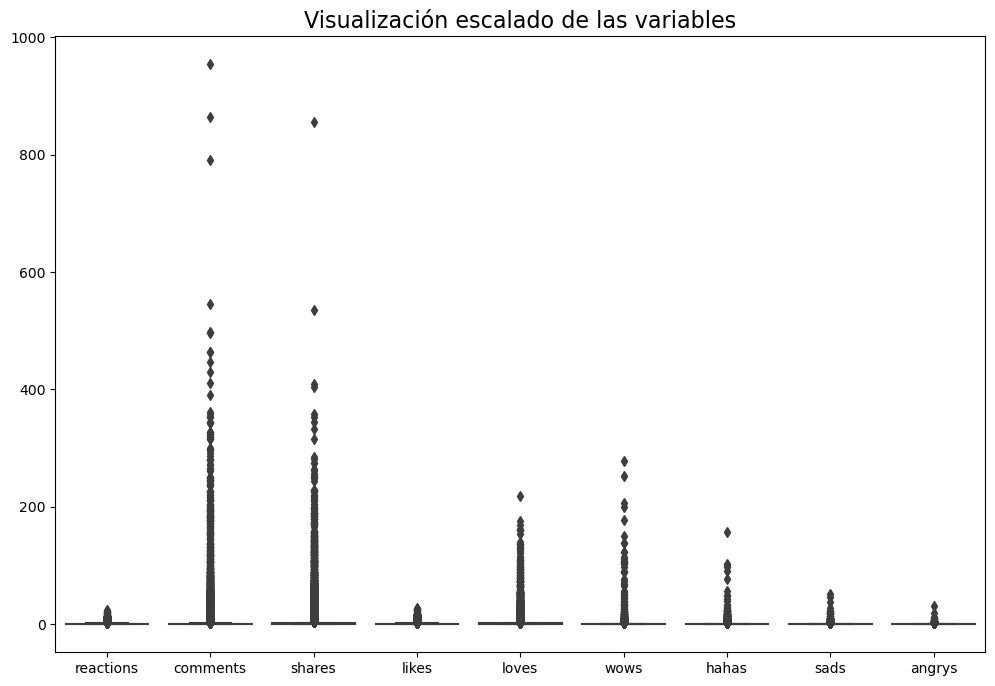

In [14]:
# Visualización gráfica

plt.figure(figsize=(12, 8))
sns.boxplot(data=Fb_Thai_modif)
plt.title('Visualización escalado de las variables', size = 16)
plt.show()

### Dummies para variable categórica "status_type"

In [15]:
Fb_Thai_modif = pd.get_dummies(Fb_Thai_modif, prefix= 'type', columns = ['status_type'])

In [16]:
# Visualización dataset con las modificaciones ejecutadas anteriormente
Fb_Thai_modif

,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys,type_link,type_photo,type_status,type_video
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,0,0,1
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,0,0,1
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.155779,-0.181818,0.00,0.193939,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
7046,-0.211055,-0.181818,0.00,-0.260606,0.333333,0.0,1.0,0.0,0.0,0,1,0,0
7047,-0.281407,-0.181818,0.00,-0.339394,0.333333,0.0,0.0,0.0,0.0,0,1,0,0
7048,1.472362,0.363636,5.50,1.769697,0.666667,0.0,0.0,0.0,0.0,0,1,0,0


### Aplicación de PCA para la reducción de la dimensión de los datos. Paso previo a la aplicación de un modelo.

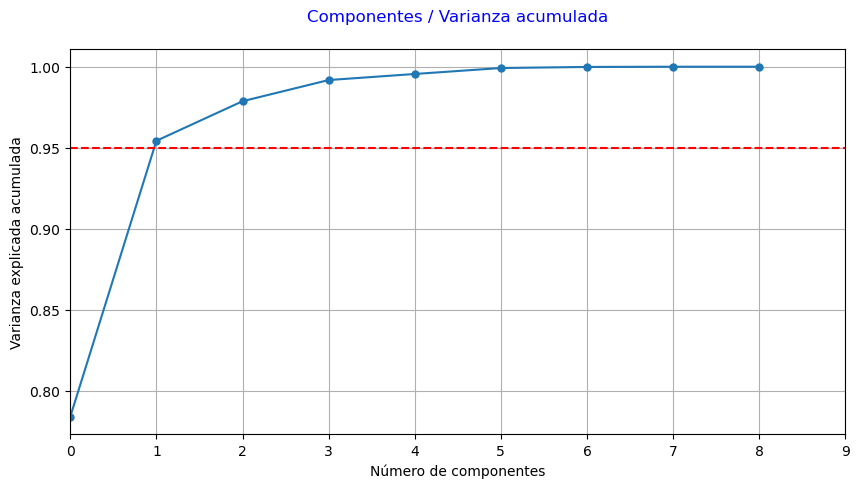

In [17]:
from sklearn.decomposition import PCA
import numpy as np

# Instanciamos el objeto y lo entrenamos con el dataframe para encontrar el número de componentes
Fb_Thai_modif_PCA = PCA().fit(Fb_Thai_modif[cols_num2])


plt.figure(figsize = (10, 5))
plt.plot(np.cumsum(Fb_Thai_modif_PCA.explained_variance_ratio_), marker = "o", markersize=5)
plt.axhline(0.95, color = 'red', linestyle = "--")

plt.xlim([0, 9])
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Componentes / Varianza acumulada', fontsize=12, pad=20, color='blue')
plt.grid()

plt.show()



In [18]:
pca = PCA(0.95).fit(Fb_Thai_modif[cols_num2])
print('Para mantener el 95% de la información se deberá elegir', pca.n_components_, 'componentes')

Para mantener el 95% de la información se deberá elegir 2 componentes


In [19]:
# Transformación de los datos en coordenadas de los componentes principales y visualización en una tabla.

Fb_Thai_modif_pca = pd.DataFrame(pca.transform(Fb_Thai_modif[cols_num2]), columns = ['PCA1', 'PCA2'], index=Fb_Thai_modif.index)
Fb_Thai_modif_pca



,PCA1,PCA2
0,48.141927,39.279885
1,-14.873807,-2.241151
2,3.371249,3.438150
3,-14.877890,-2.247779
4,-14.268106,-1.394616
...,...,...
7045,-14.880194,-2.251517
7046,-14.788323,-2.142925
7047,-14.822736,-2.173432
7048,-11.064314,1.577548


### Método de Codo para conocer el número óptimo de cluster para el modelo K-means


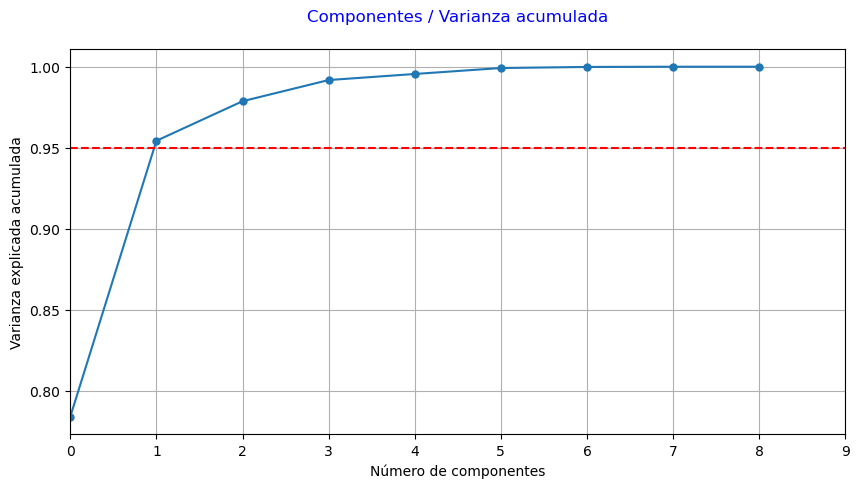

In [20]:
# Instanciamos el objeto y lo entrenamos con el dataframe para encontrar el número de componentes
Fb_Thai_modif_PCA = PCA().fit(Fb_Thai_modif[cols_num2])


plt.figure(figsize = (10, 5))
plt.plot(np.cumsum(Fb_Thai_modif_PCA.explained_variance_ratio_), marker = "o", markersize=5)
plt.axhline(0.95, color = 'red', linestyle = "--")

plt.xlim([0, 9])
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Componentes / Varianza acumulada', fontsize=12, pad=20, color='blue')
plt.grid()

plt.show()



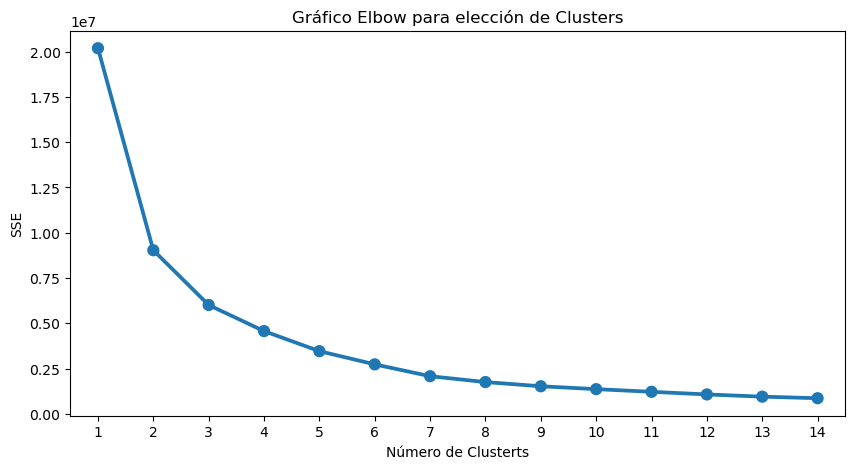

In [21]:
from sklearn.cluster import KMeans

# Función para el método de Codo
def elbow_plot(FbThai):
    sse = {}
    sse_r = []
    
    for i in range(1, 15):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(FbThai)
        sse[i] = kmeans.inertia_
        sse_r.append(kmeans.inertia_)
    
    plt.figure(figsize = (10, 5))
    plt.title('Gráfico Elbow para elección de Clusters')
    plt.xlabel('Número de Clusterts')
    plt.ylabel('SSE')
    sns.pointplot(x = list(sse.keys()),
                 y = list(sse.values()))
    plt.show()
    return sse_r


sse = elbow_plot(Fb_Thai_modif_pca)



In [24]:
from kneed import KneeLocator

k_l = KneeLocator(range(1, 15), sse, curve="convex", direction="decreasing")
print (k_l.elbow, 'es el número óptimo de clusters')

3 es el número óptimo de clusters


### Aplicación algoritmo K-means

In [32]:
# Creación de una instacia para el modelo
k_means = KMeans(n_clusters=3, random_state=42)

# Ajuste del modelo
k_means.fit(Fb_Thai_modif_pca)

# Predicción
y_pred = k_means.predict(Fb_Thai_modif_pca)
y_pred


array([1, 0, 0, ..., 0, 0, 0])

In [33]:
centroids = k_means.cluster_centers_
centroids



array([[-11.09640558,  -1.20190561],
       [100.1754256 ,  25.01590237],
       [335.02713119, -56.96723379]])

In [39]:
# Dataframe original con columna donde se observan sus respectivos clusters

Fb_Thai['KM_Cluster'] = y_pred
Fb_Thai



,status_type,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys,KM_Cluster
0,video,529,512,262,432,92,3,1,1,0,1
1,photo,150,0,0,150,0,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0,0
3,photo,111,0,0,111,0,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0,0
7047,photo,2,0,0,1,1,0,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0,0


In [41]:
# Cantidad de datos que corresponden por cluster:

Fb_Thai['KM_Cluster'].value_counts()

0    6452
1     475
2      72
Name: KM_Cluster, dtype: int64

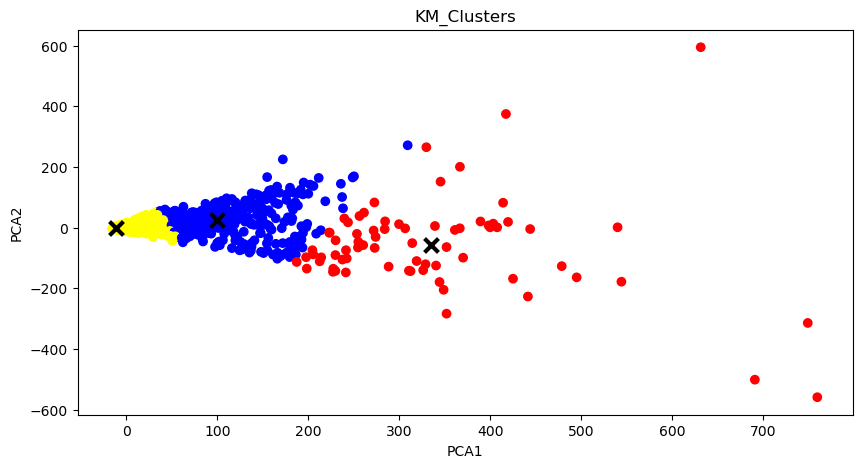

In [158]:
#  Visualización de los clusters mediante gráfico de dispersión

colors = ListedColormap(['yellow', 'blue', 'red'])

plt.figure(figsize = (10, 5))
plt.scatter(Fb_Thai_modif_pca.iloc[:, 0], Fb_Thai_modif_pca.iloc[:, 1], c = y_pred, cmap = colors)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s = 100, linewidths=3, color='black')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('KM_Clusters')
plt.show()

Mediante esta gráfica de dispersión puede observarse cómo los datos se distribuyen en varios grupos, una vez aplicado el PCA y haberlos dividido en los tres clusters con el algoritmo K-means. Cada uno de los puntos del gráfico está representando a un observación de los datos y es destinado a un determinado cluster. Los centroides de los clusters indican el centro de cada grupo. 

# Ejercicio 2
## Clasificación de los diferentes registros usando el algoritmo de Clustering Jerárquico

### Creación de un dendograma para visualizar cómo se agrupan los datos y elegir el número de clusters

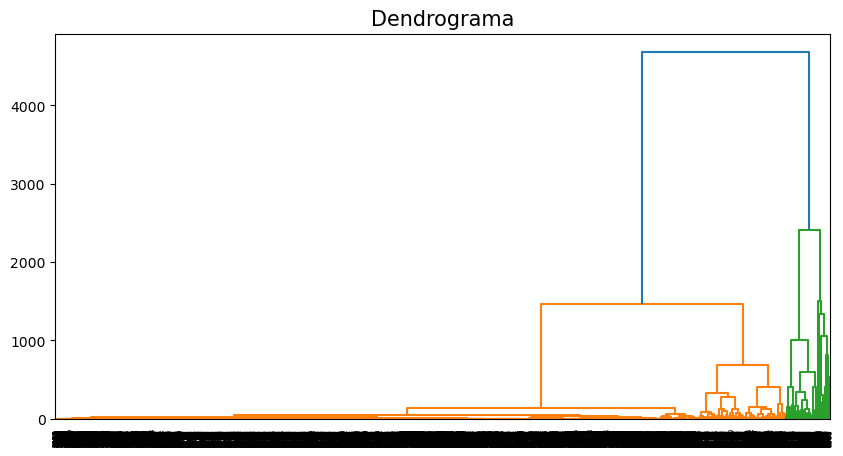

In [58]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (10, 5)) 
plt.title("Dendrograma", fontsize=15)
dendrograma = sch.dendrogram(sch.linkage(Fb_Thai_modif_pca[['PCA1', 'PCA2']], method='ward'))

### Aplicación algoritmo de Clustering Jerárquico

In [61]:
# Creación de una instacia para el modelo
agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  

# Ajuste del modelo
agglo.fit(Fb_Thai_modif_pca)

# Predicción
y_pred_agglo = agglo.labels_
y_pred_agglo


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [63]:
# Dataframe original con columna donde se observan sus respectivos clusters

Fb_Thai['Aglom_Cluster'] = y_pred_agglo
Fb_Thai

,status_type,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys,KM_Cluster,Aglom_Cluster
0,video,529,512,262,432,92,3,1,1,0,1,1
1,photo,150,0,0,150,0,0,0,0,0,0,1
2,video,227,236,57,204,21,1,1,0,0,0,1
3,photo,111,0,0,111,0,0,0,0,0,0,1
4,photo,213,0,0,204,9,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,0,1
7046,photo,16,0,0,14,1,0,1,0,0,0,1
7047,photo,2,0,0,1,1,0,0,0,0,0,1
7048,photo,351,12,22,349,2,0,0,0,0,0,1


In [64]:
# Cantidad de datos que corresponden por cluster:

Fb_Thai['Aglom_Cluster'].value_counts()

1    6602
0     397
Name: Aglom_Cluster, dtype: int64

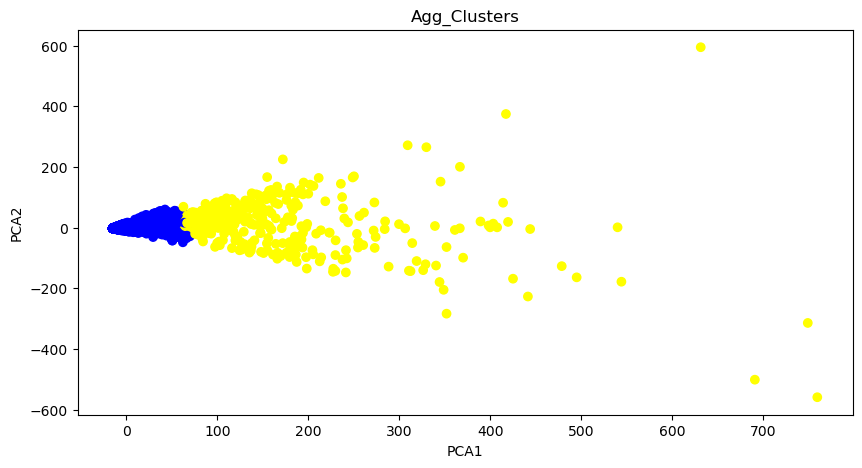

In [159]:
#  Visualización de los clusters mediante gráfico de dispersión

colors = ListedColormap(['yellow', 'blue'])

plt.figure(figsize = (10, 5))
plt.scatter(Fb_Thai_modif_pca.iloc[:, 0], Fb_Thai_modif_pca.iloc[:, 1], c = y_pred_agglo, cmap = colors)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Agg_Clusters')
plt.show()

# Ejercicio 3
## Cálculo del rendimiento del clustering mediante el parámetro Silhouette

In [160]:
from sklearn.metrics import silhouette_score

sil_Kmeans = silhouette_score(Fb_Thai_modif_pca, y_pred)
sil_agglo = silhouette_score(Fb_Thai_modif_pca, y_pred_agglo)

In [161]:
# Creación de una tabla para comparación del rendimiento de los dos modelos trabajados

tabl = pd.DataFrame( data = [sil_Kmeans.round(3), sil_agglo.round(3)],
                    columns=['Silhouette'],
                    index = ['Modelo K-means', 'Modelo Jerárquico'])
tabl

,Silhouette
Modelo K-means,0.877
Modelo Jerárquico,0.893


Mediante la métrica Silhouette, el modelo Jerárquico es el que mejores resultados da, aunque mínimamente. Pese a ello, ambos modelos han logrado separar los grupos de manera muy eficiente al estar muy cerca a 1.